In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train data

In [2]:


# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/openadmet/openadmet-expansionrx-challenge-train-data/expansion_data_train.csv")

In [3]:
len(df)

5326

In [4]:
TARGET_COLUMNS = [
    'LogD', 'KSOL', 'HLM CLint', 'MLM CLint',
    'Caco-2 Permeability Papp A>B', 'Caco-2 Permeability Efflux', 'MPPB',
    'MBPB', 'MGMB'
]
df.columns

Index(['Molecule Name', 'SMILES', 'LogD', 'KSOL', 'HLM CLint', 'MLM CLint',
       'Caco-2 Permeability Papp A>B', 'Caco-2 Permeability Efflux', 'MPPB',
       'MBPB', 'MGMB'],
      dtype='object')

In [5]:
(~df[TARGET_COLUMNS].isnull()).sum()

LogD                            5039
KSOL                            5128
HLM CLint                       3759
MLM CLint                       4522
Caco-2 Permeability Papp A>B    2157
Caco-2 Permeability Efflux      2161
MPPB                            1302
MBPB                             975
MGMB                             222
dtype: int64

<Axes: >

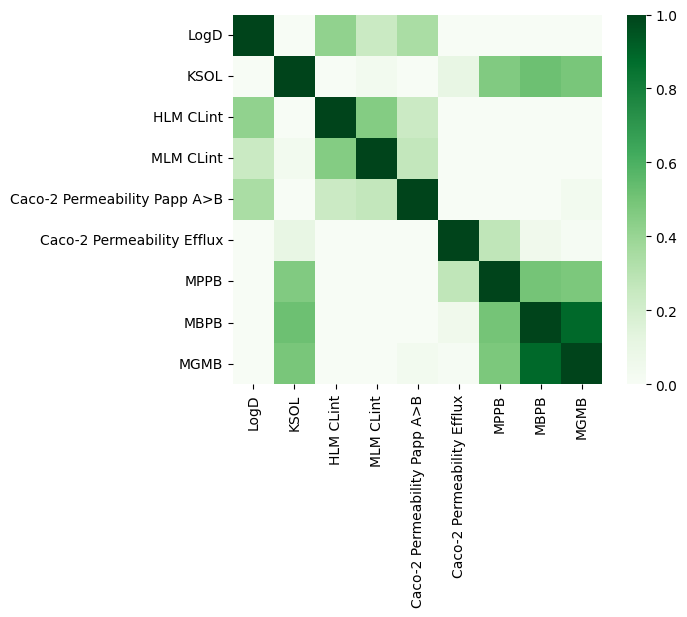

In [6]:
corrs = df.dropna().corr(numeric_only=True).round(3)#.sort_values('target_reg')
sns.heatmap(corrs,
            cmap = 'Greens',
            square=True,
            vmin = 0)

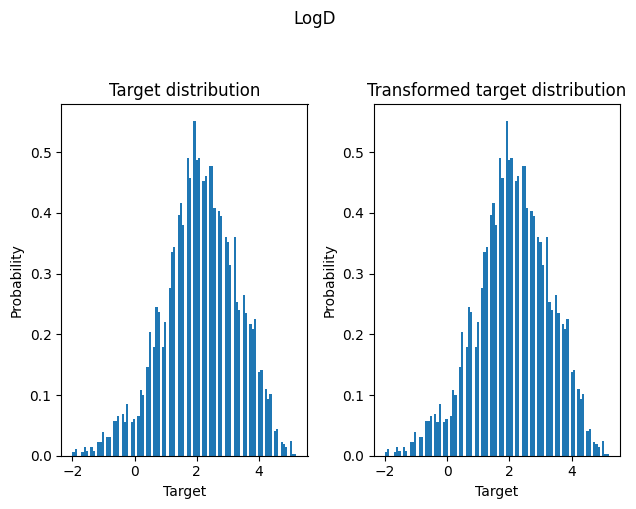

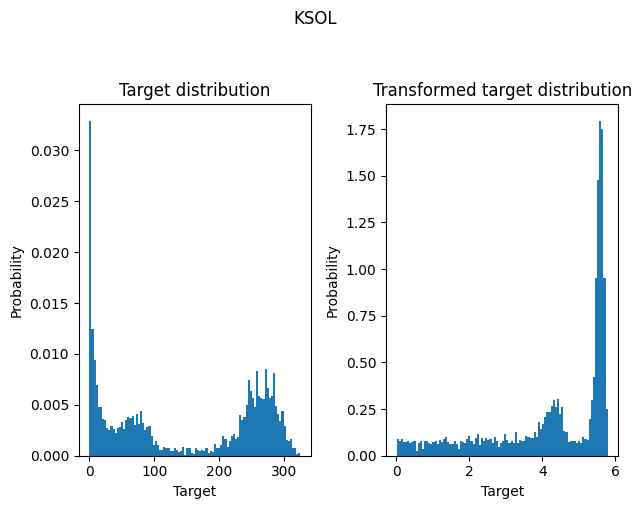

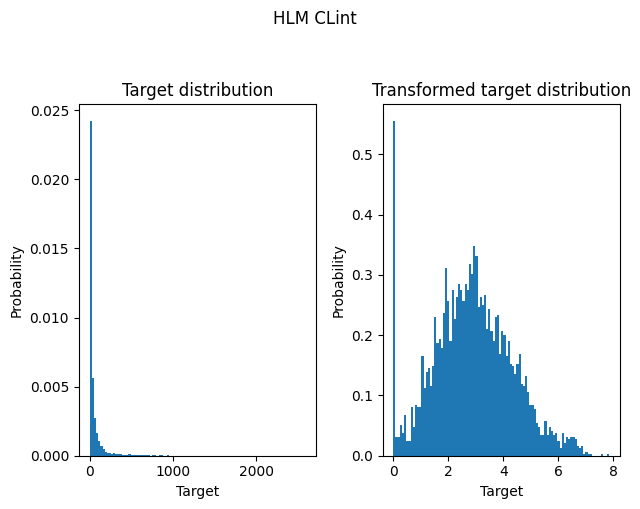

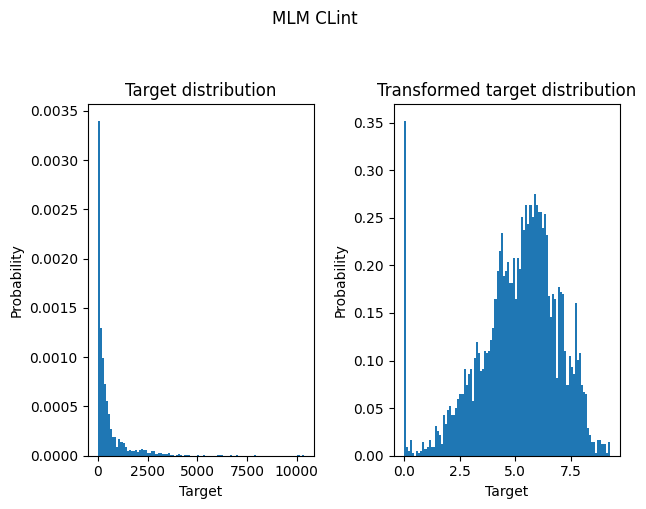

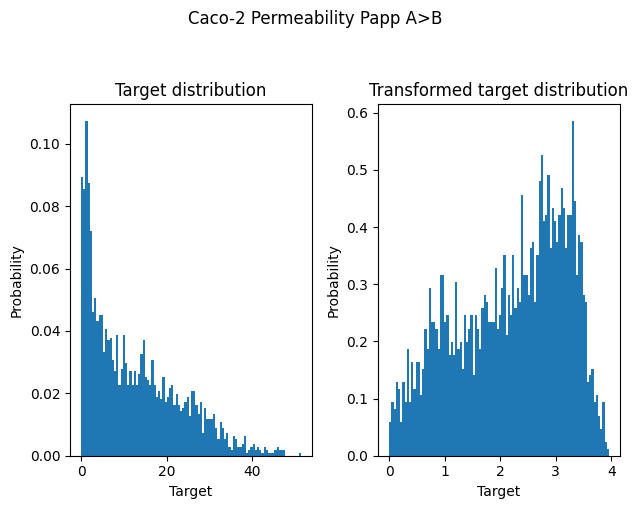

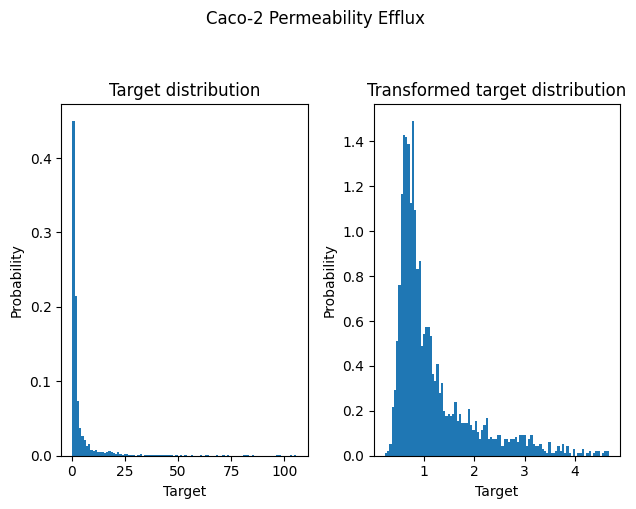

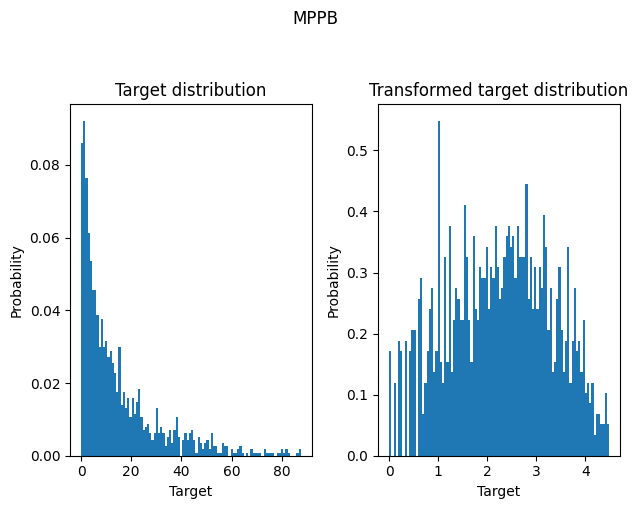

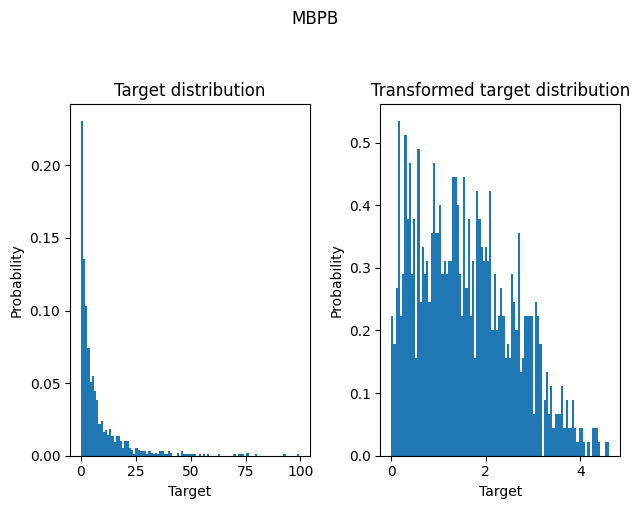

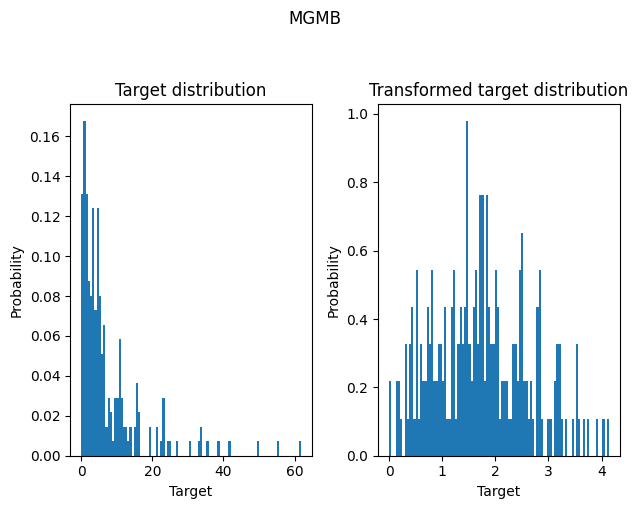

In [15]:

for column in TARGET_COLUMNS:
    
    ids = ~df[column].isnull()
    y = df.loc[ids, column].values
    fig, (ax0, ax1) = plt.subplots(1, 2)
    if column.find('Log') >= 0:
        y_trans=y
    else:
        y_trans = np.log1p(y)
    ax0.hist(y, bins=100, density=True)
    # ax0.set_xlim([0, 2000])
    ax0.set_ylabel("Probability")
    ax0.set_xlabel("Target")
    ax0.set_title("Target distribution")

    ax1.hist(y_trans, bins=100, density=True)
    ax1.set_ylabel("Probability")
    ax1.set_xlabel("Target")
    ax1.set_title("Transformed target distribution")

    fig.suptitle(column, y=1.05)
    plt.tight_layout()

'LogD'